<a href="https://colab.research.google.com/github/fahad-roshan/ADS_ass_3/blob/master/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd
# load the dataset

path = '/content/Womens Clothing E-Commerce Reviews.csv'
clothing_data = pd.read_csv(path)
clothing_data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [30]:
pip install pandas autocorrect contractions nltk

In [31]:
clothing_data.dropna(inplace = True)
print(clothing_data.shape)

(19662, 11)


In [32]:
clothing_data = clothing_data[["Review Text", "Recommended IND"]]

In [33]:
from autocorrect import Speller
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure necessary NLTK data is downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define stopwords
stop_words = set(stopwords.words('english'))


# Initialize spell checker and lemmatizer
spell = Speller(fast=True)
lemmatizer = WordNetLemmatizer()

# Apply the cleaning steps directly on the DataFrame
clothing_data['Cleaned Review Text'] = clothing_data['Review Text'].apply(lambda x: " ".join(
    [lemmatizer.lemmatize(word) for word in [word for word in word_tokenize(
        contractions.fix(spell(x)).lower()) if word.isalpha()] if word not in stop_words]))

print(clothing_data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                             Review Text  Recommended IND  \
2      I had such high hopes for this dress and reall...                0   
3      I love, love, love this jumpsuit. it's fun, fl...                1   
4      This shirt is very flattering to all due to th...                1   
5      I love tracy reese dresses, but this one is no...                0   
6      I aded this in my basket at hte last mintue to...                1   
...                                                  ...              ...   
23481  I was very happy to snag this dress at such a ...                1   
23482  It reminds me of maternity clothes. soft, stre...                1   
23483  This fit well, but the top was very see throug...                0   
23484  I bought this dress for a wedding i have this ...                1   
23485  This dress in a lovely platinum is feminine an...                1   

                                     Cleaned Review Text  
2      high hope

In [34]:
positive_reviews = clothing_data[clothing_data["Recommended IND"] == 1]["Review Text"]
positive_reviews

,Review Text
3,"I love, love, love this jumpsuit. it's fun, fl..."
4,This shirt is very flattering to all due to th...
6,I aded this in my basket at hte last mintue to...
7,"I ordered this in carbon for store pick up, an..."
8,I love this dress. i usually get an xs but it ...
...,...
23479,So i wasn't sure about ordering this skirt bec...
23481,I was very happy to snag this dress at such a ...
23482,"It reminds me of maternity clothes. soft, stre..."
23484,I bought this dress for a wedding i have this ...


In [35]:
negative_reviews = clothing_data[clothing_data["Recommended IND"] == 0]["Review Text"]
negative_reviews

,Review Text
2,I had such high hopes for this dress and reall...
5,"I love tracy reese dresses, but this one is no..."
10,Dress runs small esp where the zipper area run...
22,"First of all, this is not pullover styling. th..."
25,"Loved the material, but i didnt really look at..."
...,...
23447,I really wanted to like this dress and was enc...
23449,I tried these on because the color is really p...
23460,I purchased this for a very good price and i t...
23478,I was surprised at the positive reviews for th...


In [36]:
positive_words = " ".join(positive_reviews)
positive_words[:1000]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments! This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!! I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops. I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice

In [37]:
negative_words = " ".join(negative_reviews)
negative_words[:1000]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress. Dress run

In [38]:
from wordcloud import WordCloud
wordcloud_positive = WordCloud(background_color = "white", max_words = 250, colormap = "inferno")
wordcloud_positive.generate(positive_words)

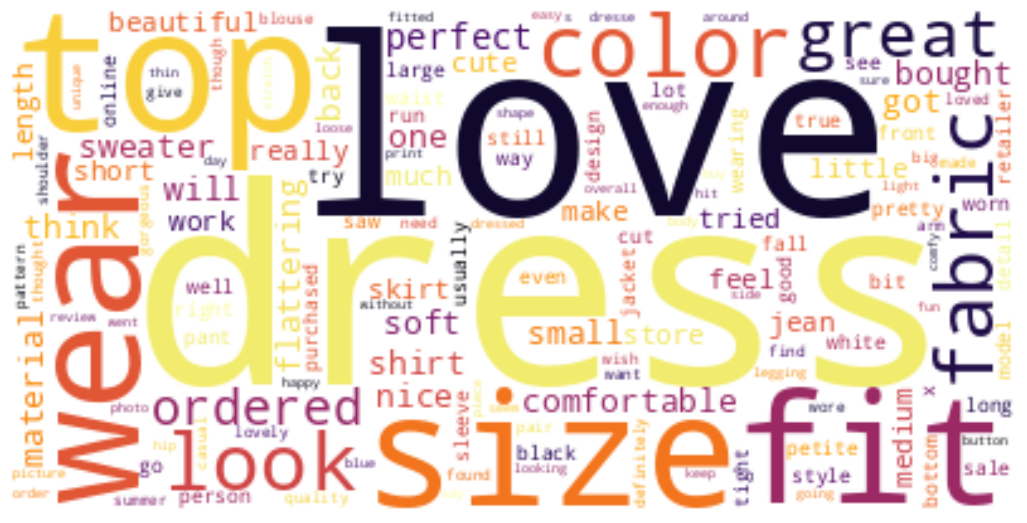

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show()

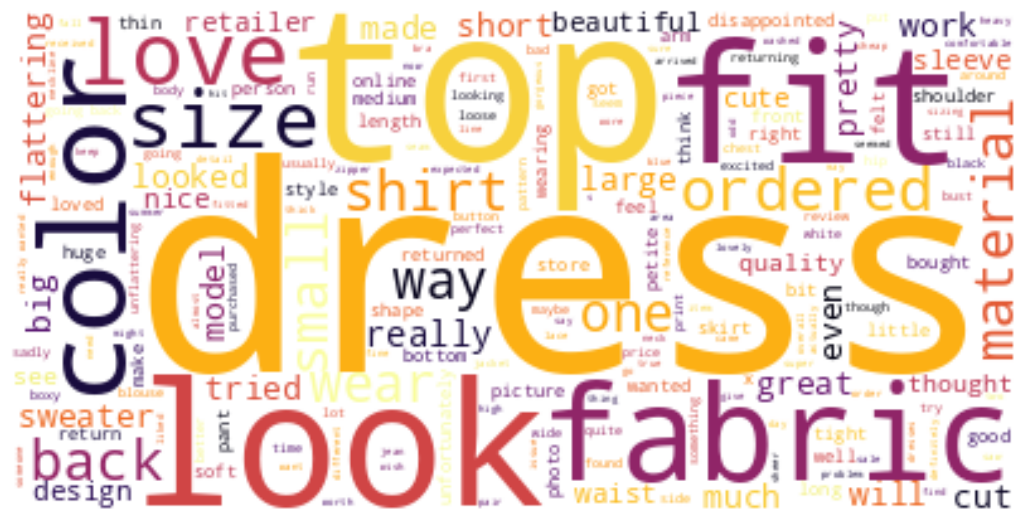

In [40]:
wordcloud_negative = WordCloud(background_color = "white", max_words = 250, colormap = "inferno")
wordcloud_negative.generate(negative_words)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud_negative, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [41]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Extract the feature (Cleaned Review Text) and target (Recommended IND) columns from the DataFrame
X = clothing_data["Cleaned Review Text"].values  # Features: the cleaned review text
y = clothing_data["Recommended IND"].values      # Target: the recommendation indicator (0 or 1)

# Split the dataset into training and test sets
# test_size = 0.1: 10% of the data will be used as the test set
# stratify = y: ensures that the train and test sets have the same proportion of each class as the original dataset
# random_state = 42: ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

# X_train: Training set features
# X_test: Test set features
# y_train: Training set target labels
# y_test: Test set target labels


In [42]:
# Import the CountVectorizer from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object with a minimum document frequency of 3
# min_df=3: Terms must appear in at least 3 documents to be included in the vocabulary
vectorizer = CountVectorizer(min_df=3)

# Fit the vectorizer on the training data and transform the training data into a document-term matrix
X_train_count = vectorizer.fit_transform(X_train)

# Transform the test data using the fitted vectorizer (without refitting)
X_test_count = vectorizer.transform(X_test)

# Convert the document-term matrix for the training data to a dense array
X_train_count_array = X_train_count.toarray()

# Create a DataFrame from the dense array with columns named after the features (terms) in the vocabulary
X_train_count_df = pd.DataFrame(X_train_count_array, columns=vectorizer.get_feature_names_out())

# Display the DataFrame
X_train_count_df


,aa,ab,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,...,younger,youthful,yr,zero,zigzag,zip,zipper,zippered,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Import the MultinomialNB class from scikit-learn
from sklearn.naive_bayes import MultinomialNB

# Create a MultinomialNB object with specified hyperparameters
# alpha = 2.1: Smoothing parameter to handle zero frequencies
# force_alpha = True: Force alpha to be positive (available in recent scikit-learn versions)
# fit_prior = False: Do not use the class prior probabilities
nb = MultinomialNB(alpha=2.1, force_alpha=True, fit_prior=False)

# Fit the MultinomialNB model to the training data
# X_train_count: The document-term matrix for the training data
# y_train: The target labels for the training data
nb.fit(X_train_count, y_train)


MultinomialNB(alpha=2.1, fit_prior=False, force_alpha=True)

In [44]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample tweet
tweet = ["Absolutely wonderful - silky and sexy and comfortable"]

# Transform the tweet using the fitted CountVectorizer
tweet_count = vectorizer.transform(tweet)

# Predict the class label using the trained MultinomialNB model
prediction = nb.predict(tweet_count)

# Print the predicted class label
print("Predicted class label:", prediction[0])


Predicted class label: 1


In [45]:
# Import necessary metrics from scikit-learn
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

# Predict the target labels for the test set
y_pred = nb.predict(X_test_count)

# Predict the target labels for the training set
y_pred_train = nb.predict(X_train_count)

# Evaluate the model on the test set
print("Test Set\n")
# Print the confusion matrix for the test set
print(confusion_matrix(y_test, y_pred))
# Print the classification report for the test set
print(classification_report(y_test, y_pred))

# Evaluate the model on the training set
print("Train Set\n")
# Print the confusion matrix for the training set
print(confusion_matrix(y_train, y_pred_train))
# Print the classification report for the training set
print(classification_report(y_train, y_pred_train))


Test Set

[[ 306   52]
 [ 213 1396]]
              precision    recall  f1-score   support

           0       0.59      0.85      0.70       358
           1       0.96      0.87      0.91      1609

    accuracy                           0.87      1967
   macro avg       0.78      0.86      0.81      1967
weighted avg       0.90      0.87      0.87      1967

Train Set

[[ 2804   413]
 [ 1726 12752]]
              precision    recall  f1-score   support

           0       0.62      0.87      0.72      3217
           1       0.97      0.88      0.92     14478

    accuracy                           0.88     17695
   macro avg       0.79      0.88      0.82     17695
weighted avg       0.91      0.88      0.89     17695



In [46]:
# Import the LinearSVC class from scikit-learn
from sklearn.svm import LinearSVC

# Import the cross_validate function from scikit-learn
from sklearn.model_selection import cross_validate

# Create a LinearSVC model with specified hyperparameters
# C=0.001: Regularization parameter (inverse of regularization strength)
# class_weight='balanced': Adjusts weights inversely proportional to class frequencies
# random_state=42: Ensures reproducibility of results
svm = LinearSVC(C=0.001, class_weight='balanced', random_state=42)

# fit the LinearSVC model
svm.fit(X_train_count, y_train)

# Perform cross-validation on the training data
# scoring=['precision', 'recall', 'f1', 'accuracy']: Metrics to evaluate during cross-validation
# cv=10: Number of cross-validation folds
# return_train_score=True: Include training scores in the results
scores = cross_validate(svm, X_train_count, y_train, scoring=['precision', 'recall', 'f1', 'accuracy'], cv=10, return_train_score=True)

# Create a DataFrame from the cross-validation scores
# index=range(1, 11): Set the index to represent the fold numbers (1 to 10)
df_scores = pd.DataFrame(scores, index=range(1, 11))

# Calculate the mean of the test scores across all folds (ignoring the training scores)
# [2:]: Selects only the test scores (precision, recall, f1, accuracy)
mean_scores = df_scores.mean()[2:]

# Display the mean test scores
mean_scores


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: Futu

,0
test_precision,0.958871
train_precision,0.969275
test_recall,0.843695
train_recall,0.850033
test_f1,0.897585
train_f1,0.905746
test_accuracy,0.842497
train_accuracy,0.855251


In [47]:


# Sample tweet or text
text = ["This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!"]

# Ensure you have the same CountVectorizer instance used during training
# Vectorize the new text
text_count = vectorizer.transform(text)

# Predict using the trained LinearSVC model
predictions = svm.predict(text_count)

# Print the predicted class label
print("Predicted class label:", predictions[0])


Predicted class label: 1


In [48]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


# Create and fit the KNeighborsClassifier model
# n_neighbors=3: Number of neighbors to use
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_count, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_count)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.16      0.24       358
           1       0.84      0.97      0.90      1609

    accuracy                           0.82      1967
   macro avg       0.67      0.56      0.57      1967
weighted avg       0.78      0.82      0.78      1967



In [49]:
# Sample new text for prediction
text = ["Beautifully made pants and on trend with the flared crop. so much cuter in person. love these!"]

# Transform the new text using the fitted vectorizer
text_count = vectorizer.transform(text)

# Predict using the fitted k-NN model
predictions = knn.predict(text_count)

# Print the predicted class label
print("Predicted class label:", predictions[0])

Predicted class label: 1


In [50]:
from sklearn.linear_model import LogisticRegression

# Create and fit the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_count, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_count)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.62      0.66       358
           1       0.92      0.94      0.93      1609

    accuracy                           0.88      1967
   macro avg       0.81      0.78      0.79      1967
weighted avg       0.88      0.88      0.88      1967



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# Sample new text for prediction
text = ["Why do designers keep making crop tops??!! i can't imagine this would be flattering on anyone, especially someone average height and well endowed on top. i looked like a football player. the pattern and fabric are gorgeous, so if you are like 4' tall and super tiny and can fit xxs this may work? i am between a 6-8 and fit a small and it was huge on me and almost was bigger at the bottom than the top. such a weird cut. there is a cami underneath so if it rides up that will show but that is so 80s"]

# Transform the new text using the fitted vectorizer
text_count = vectorizer.transform(text)

# Predict using the fitted Logistic Regression model
predictions = log_reg.predict(text_count)

# Print the predicted class label
print("Predicted class label:", predictions[0])

Predicted class label: 0


In [52]:
def evaluate(model, X_test, y_test):
    """
    Trains a given model and evaluates its performance on the test set.

    Parameters:
    model : sklearn estimator
        The model to be trained and evaluated.
    X_train : array-like, shape (n_samples, n_features)
        The training feature matrix.
    y_train : array-like, shape (n_samples,)
        The target labels for the training set.
    X_test : array-like, shape (n_samples, n_features)
        The test feature matrix.
    y_test : array-like, shape (n_samples,)
        The target labels for the test set.

    Returns:
    dict : A dictionary containing evaluation metrics for the model.
        - 'accuracy': Accuracy score of the model on the test set.
        - 'precision': Precision score of the model on the test set, weighted by class.
        - 'recall': Recall score of the model on the test set, weighted by class.
        - 'f1_score': F1 score of the model on the test set, weighted by class.
    """

    # Predict the target labels for the test set
    y_pred = model.predict(X_test)

    # Calculate and return the evaluation metrics
    return {
        'accuracy': accuracy_score(y_test, y_pred),  # Accuracy score: Proportion of correctly classified instances
        'precision': precision_score(y_test, y_pred, average='weighted'),  # Weighted precision score: Precision averaged across classes, weighted by class support
        'recall': recall_score(y_test, y_pred, average='weighted'),  # Weighted recall score: Recall averaged across classes, weighted by class support
        'f1_score': f1_score(y_test, y_pred, average='weighted')  # Weighted F1 score: Harmonic mean of precision and recall, averaged across classes, weighted by class support
    }



In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of models
modelList = [nb, svm, knn, log_reg]

# Dictionary to store evaluation metrics
results = {}

# Iterate over each model and evaluate
for model in modelList:
    # Train and evaluate the model
    metrics = evaluate(model,  X_test_count, y_test)
    # Store the results with the model's name as the key
    results[model.__class__.__name__] = metrics

# Convert results to a DataFrame for easy visualization
results_df = pd.DataFrame(results).T
print(results_df)

                      accuracy  precision    recall  f1_score
MultinomialNB         0.865277   0.895930  0.865277  0.874096
LinearSVC             0.855109   0.895979  0.855109  0.866090
KNeighborsClassifier  0.818505   0.777001  0.818505  0.777721
LogisticRegression    0.883071   0.878478  0.883071  0.880181


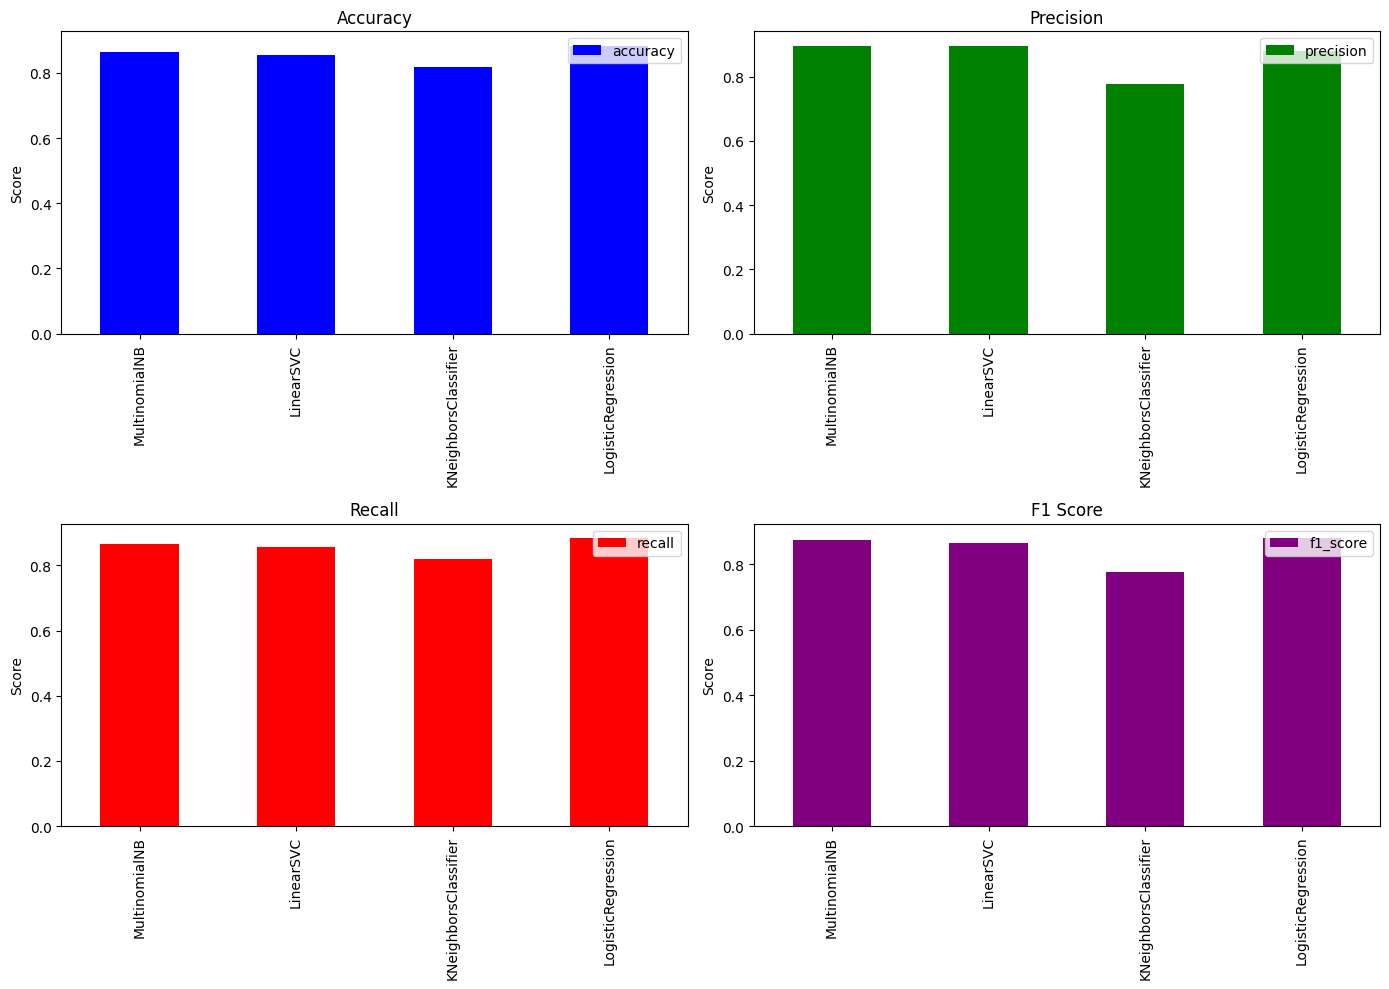

In [54]:
# Plot accuracy, precision, recall, and F1-score for each model
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy
results_df['accuracy'].plot(kind='bar', ax=ax[0, 0], color='blue', legend=True)
ax[0, 0].set_title('Accuracy')
ax[0, 0].set_ylabel('Score')

# Precision
results_df['precision'].plot(kind='bar', ax=ax[0, 1], color='green', legend=True)
ax[0, 1].set_title('Precision')
ax[0, 1].set_ylabel('Score')

# Recall
results_df['recall'].plot(kind='bar', ax=ax[1, 0], color='red', legend=True)
ax[1, 0].set_title('Recall')
ax[1, 0].set_ylabel('Score')

# F1-Score
results_df['f1_score'].plot(kind='bar', ax=ax[1, 1], color='purple', legend=True)
ax[1, 1].set_title('F1 Score')
ax[1, 1].set_ylabel('Score')

# Adjust layout
plt.tight_layout()
plt.show()